In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix

import keras
import keras.layers as layers
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist, fashion_mnist

import requests
import ssl

In [2]:
requests.packages.urllib3.disable_warnings()

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
(mnist_pic_train, mnist_labels_train), (mnist_pic_test, mnist_labels_test) = mnist.load_data()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


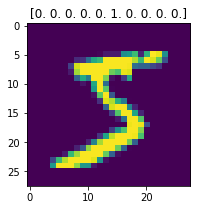

In [4]:
mnist_labels_train = to_categorical(mnist_labels_train)
mnist_labels_test = to_categorical(mnist_labels_test)

mnist_pic_train = mnist_pic_train.reshape(mnist_pic_train.shape[0], mnist_pic_train.shape[1], mnist_pic_train.shape[2], 1)
mnist_pic_test = mnist_pic_test.reshape(mnist_pic_test.shape[0], mnist_pic_test.shape[1], mnist_pic_test.shape[2], 1)

plt.figure(figsize=(3, 3))
plt.imshow(mnist_pic_train[0])
plt.title(mnist_labels_train[0])
plt.show()

In [5]:
def get_lenet_model():
    model = Sequential()

    model.add(layers.Conv2D(32, kernel_size=3,activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [6]:
model_lenet = get_lenet_model()
model_lenet.summary()

2022-06-01 14:09:29.191310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       1

In [7]:
model_lenet.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Epoch 1/5
1875/1875 [==============================] - 150s 79ms/step - loss: 0.1887 - accuracy: 0.9428 - val_loss: 0.0414 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0263 - val_accuracy: 0.9917
Epoch 4/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.0278 - val_accuracy: 0.9913
Epoch 5/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0429 - accuracy: 0.9873 - val_loss: 0.0234 - val_accuracy: 0.9935


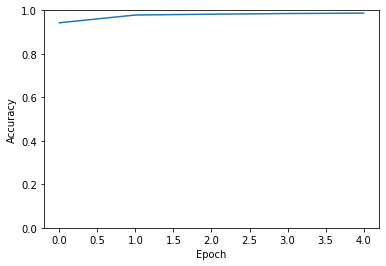

In [8]:
history_lenet = model_lenet.fit(mnist_pic_train, mnist_labels_train, epochs=5, validation_data=(mnist_pic_test, mnist_labels_test))

plt.plot(history_lenet.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [9]:
def get_another_model():
    model = Sequential()

    model.add(layers.Conv2D(filters=10, kernel_size=(4, 4), activation='tanh', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(filters=20, kernel_size=(4, 4), activation='tanh'))
    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [10]:
my_model = get_another_model()
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 10)        170       
                                                                 
 batch_normalization_7 (Batc  (None, 25, 25, 10)       40        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 10)       0         
 )                                                               
                                                                 
 batch_normalization_8 (Batc  (None, 23, 23, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 20)        3220      
                                                      

In [11]:
my_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1990 - accuracy: 0.9472 - val_loss: 0.1046 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0864 - accuracy: 0.9759 - val_loss: 0.0868 - val_accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0739 - val_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0686 - val_accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0813 - val_accuracy: 0.9791


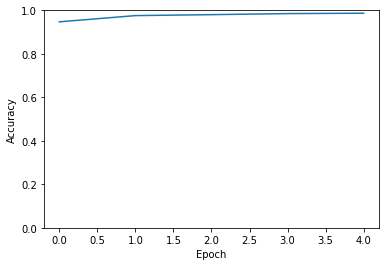

In [12]:
my_history = my_model.fit(mnist_pic_train, mnist_labels_train, epochs=5, validation_data=(mnist_pic_test, mnist_labels_test))

plt.plot(my_history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [13]:
(fashion_mnist_pic_train, fashion_mnist_labels_train), (fashion_mnist_pic_test, fashion_mnist_labels_test) = fashion_mnist.load_data()
Y_matrix = fashion_mnist_labels_test

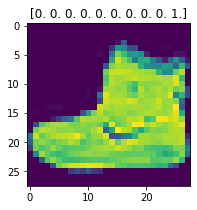

In [14]:
fashion_mnist_labels_train = to_categorical(fashion_mnist_labels_train)
fashion_mnist_labels_test = to_categorical(fashion_mnist_labels_test)

fashion_mnist_pic_train = fashion_mnist_pic_train.reshape(fashion_mnist_pic_train.shape[0], fashion_mnist_pic_train.shape[1], fashion_mnist_pic_train.shape[2], 1)
fashion_mnist_pic_test = fashion_mnist_pic_test.reshape(fashion_mnist_pic_test.shape[0], fashion_mnist_pic_test.shape[1], fashion_mnist_pic_test.shape[2], 1)

plt.figure(figsize=(3, 3))
plt.imshow(fashion_mnist_pic_train[0])
plt.title(fashion_mnist_labels_train[0])
plt.show()

In [15]:
res_lenet_history  = model_lenet.fit(fashion_mnist_pic_train, fashion_mnist_labels_train, epochs=5, validation_data=(fashion_mnist_pic_test, fashion_mnist_labels_test))

Epoch 1/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.4979 - accuracy: 0.8272 - val_loss: 0.3293 - val_accuracy: 0.8828
Epoch 2/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.3206 - accuracy: 0.8845 - val_loss: 0.2824 - val_accuracy: 0.9015
Epoch 3/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.2808 - accuracy: 0.8990 - val_loss: 0.2479 - val_accuracy: 0.9117
Epoch 4/5
1875/1875 [==============================] - 149s 79ms/step - loss: 0.2551 - accuracy: 0.9094 - val_loss: 0.2316 - val_accuracy: 0.9153
Epoch 5/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.2391 - accuracy: 0.9145 - val_loss: 0.2294 - val_accuracy: 0.9178


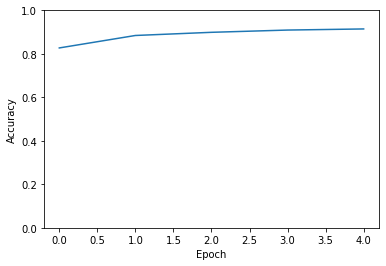

In [16]:
plt.plot(res_lenet_history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [17]:
predictions_predict = model_lenet.predict(fashion_mnist_pic_test)
predictions = list(map(np.argmax, predictions_predict))
print(predictions_predict)
confusion_matrix(Y_matrix, predictions)

313/313 [==============================] - 4s 12ms/step
[[3.9464121e-07 6.9899784e-07 3.1411017e-07 ... 1.0914251e-02
  4.8033678e-07 9.8891163e-01]
 [1.2707825e-04 2.2120480e-06 9.9901378e-01 ... 2.9413984e-08
  2.7386525e-07 1.6364490e-07]
 [5.3487275e-07 9.9999464e-01 1.4238964e-07 ... 3.5324906e-08
  5.4237478e-07 1.5579226e-07]
 ...
 [3.1608019e-07 1.2574205e-07 1.9558004e-07 ... 2.6942507e-08
  9.9999714e-01 1.6910947e-08]
 [1.0169899e-08 9.9999976e-01 1.0106839e-08 ... 4.9329080e-10
  2.3571185e-09 2.7151701e-09]
 [1.0047040e-05 3.0801228e-05 1.1153583e-05 ... 3.0036932e-02
  1.5506739e-04 2.8120857e-04]]


array([[878,   4,  16,  11,   1,   1,  82,   0,   7,   0],
       [  2, 980,   2,  12,   1,   0,   2,   0,   1,   0],
       [ 11,   1, 888,   8,  43,   0,  49,   0,   0,   0],
       [  9,   4,  11, 899,  38,   0,  38,   0,   1,   0],
       [  0,   1,  36,  14, 901,   0,  48,   0,   0,   0],
       [  0,   0,   0,   0,   0, 982,   0,  16,   0,   2],
       [113,   2,  43,  19,  74,   0, 743,   0,   6,   0],
       [  0,   0,   0,   0,   0,   6,   0, 986,   0,   8],
       [  5,   1,   3,   2,   3,   2,   3,   4, 977,   0],
       [  0,   0,   0,   0,   0,   8,   0,  48,   0, 944]])

In [18]:
matrix_objects = [[0 for _ in range(10)] for _ in range(10)]
matrix_predictions = [[0 for _ in range(10)] for _ in range(10)]

for i in range(len(fashion_mnist_pic_test)):
    cur_object = Y_matrix[i]
    for j in range(10):
        if predictions_predict[i][j] > matrix_predictions[cur_object][j]:
            matrix_predictions[cur_object][j] = predictions_predict[i][j]
            matrix_objects[cur_object][j] = i

matrix_objects

[[275, 3205, 8919, 1111, 9251, 3466, 2506, 3466, 2599, 9809],
 [8610, 4137, 9485, 787, 5597, 3052, 8156, 9485, 6331, 2396],
 [8598, 3880, 8265, 3457, 2278, 6964, 8879, 7073, 7073, 3187],
 [979, 4462, 9260, 5001, 5576, 6676, 607, 6676, 713, 2736],
 [4251, 8621, 5255, 3084, 4345, 5661, 6899, 801, 7265, 801],
 [4948, 4948, 4948, 4948, 4948, 812, 4948, 1953, 4948, 4599],
 [7778, 5987, 2985, 147, 1643, 9199, 1036, 2551, 1645, 8940],
 [2100, 6977, 2100, 5786, 8203, 12, 2100, 4339, 8808, 2914],
 [3008, 635, 8888, 6441, 9969, 1300, 1066, 9524, 2762, 3988],
 [5512, 3070, 5512, 3070, 5512, 5946, 5512, 5077, 1016, 9993]]

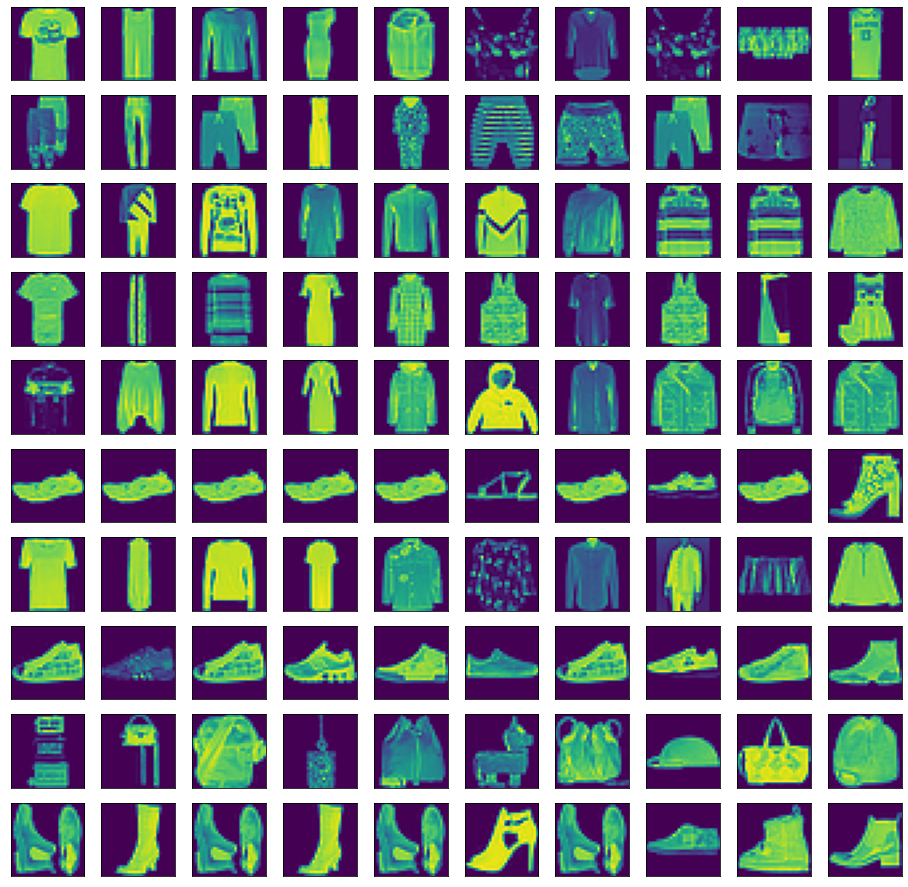

In [19]:
plt.figure(figsize=(16, 16))

for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(fashion_mnist_pic_test[matrix_objects[i // 10][i % 10]])

plt.show()

# 0 - Футболки / топы
# 1 - Шорты
# 2 - Свитер
# 3 - Платье
# 4 - Плащ
# 5 - Сандали
# 6 - Рубашка
# 7 - Кроссовки
# 8 - Сумка
# 9 - Ботинки